In [14]:
def eval_line(f, x0, x1, alpha):
    m = (f(x1) - f(x0))/(x1 - x0)
    return m*(alpha - x0) + f(x0)

In [15]:
import numpy as np


def eval_lin_spline(f, a, b, n_int, n_eval):
    intervals = np.linspace(a,b,n_int+1)
    eval = np.zeros((n_int,n_eval))
    for i in range(n_int):
        int_spacing = (intervals[i+1] - intervals[i]) / n_eval
        for j in range(n_eval):
            alpha = intervals[i] + int_spacing * j
            eval[i][j] = eval_line(f, intervals[i], intervals[i+1], alpha)
    return eval.flatten()

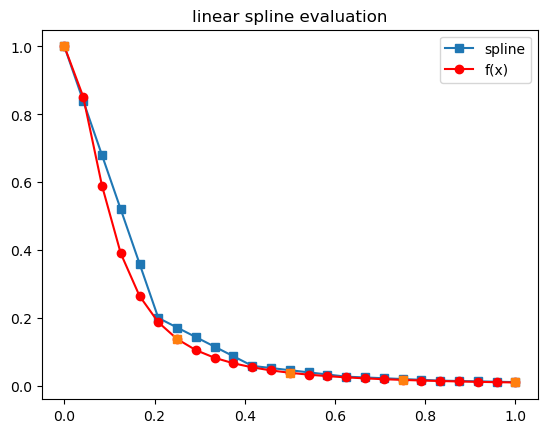

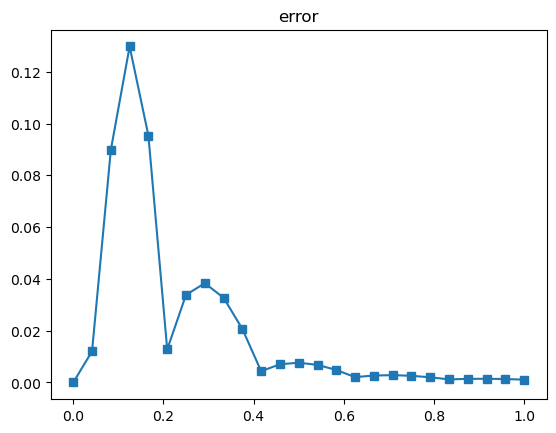

In [37]:
from matplotlib import pyplot as plt

# f = lambda x: np.exp(x)
f = lambda x: 1/(1+(10*x)**2)
a = 0
b = 1

''' points of evaluation per interval '''
Neval = 5

''' number of intervals '''
Nint = 5

'''evaluate the linear spline'''
yeval = eval_lin_spline(f, a, b, Nint, Neval)

''' evaluate f at the evaluation points'''
xeval = np.linspace(a, b, yeval.shape[0])
ytrue = f(xeval)

xint = np.linspace(a, b, Nint)

plt.plot(xeval, yeval, marker='s', label='spline')
plt.plot(xeval, ytrue, marker='o', color='r', label='f(x)')
plt.plot(xint, f(xint), marker='s', linestyle='none')
plt.title('linear spline evaluation')
plt.legend()
plt.show()

err = np.abs(yeval - ytrue)
plt.plot(xeval, err, marker='s')
plt.title('error')
plt.show()